# **Heart Disease Prediction**

**I. Importing essential libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


**II. Importing and understanding our dataset**





In [ ]:
#loading the csv data to a panadas data frame
heart_data = pd.read_csv('/content/heart.csv')

Printing out a few columns

In [ ]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
#print last five rows of dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


Shape of dataset

In [ ]:
#number of rows and columns in the dataset
heart_data.shape

(1025, 14)

In [ ]:
#getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
#checking missing value
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

*We have no value missing*

**Let's understand our columns better**

In [ ]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(heart_data.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


Description

In [ ]:
#statstical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


NOW WE WILL ANALYSE THE TARGET VALUE

In [ ]:
heart_data["target"].describe()

count    1025.000000
mean        0.513171
std         0.500070
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

In [ ]:
#checking the distribution of target varibale
heart_data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [ ]:
heart_data["target"].describe()

count    1025.000000
mean        0.513171
std         0.500070
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

In [ ]:
heart_data["target"].unique()

array([0, 1])

we are having 0 and 1 as unique value seems to be a classification problem

In [ ]:
X = heart_data.drop(columns='target',axis=1)
Y = heart_data['target']

In [ ]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [ ]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


In [ ]:
print(X.shape)
print(Y.shape)

(1025, 13)
(1025,)


**Checking correlation between columns**

In [ ]:
dataset=heart_data.corr()
print(dataset)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.103240 -0.071966  0.271121  0.219823  0.121243   
sex      -0.103240  1.000000 -0.041119 -0.078974 -0.198258  0.027200   
cp       -0.071966 -0.041119  1.000000  0.038177 -0.081641  0.079294   
trestbps  0.271121 -0.078974  0.038177  1.000000  0.127977  0.181767   
chol      0.219823 -0.198258 -0.081641  0.127977  1.000000  0.026917   
fbs       0.121243  0.027200  0.079294  0.181767  0.026917  1.000000   
restecg  -0.132696 -0.055117  0.043581 -0.123794 -0.147410 -0.104051   
thalach  -0.390227 -0.049365  0.306839 -0.039264 -0.021772 -0.008866   
exang     0.088163  0.139157 -0.401513  0.061197  0.067382  0.049261   
oldpeak   0.208137  0.084687 -0.174733  0.187434  0.064880  0.010859   
slope    -0.169105 -0.026666  0.131633 -0.120445 -0.014248 -0.061902   
ca        0.271551  0.111729 -0.176206  0.104554  0.074259  0.137156   
thal      0.072297  0.198424 -0.163341  0.059276  0.100244 -0.04

In [ ]:
#Checking correlation between columns
print(heart_data.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64


**Exploratory Data Analysis (EDA)**

**First, analysing the target variable:**

Text(0.5, 1.0, 'Count of each Target Class')

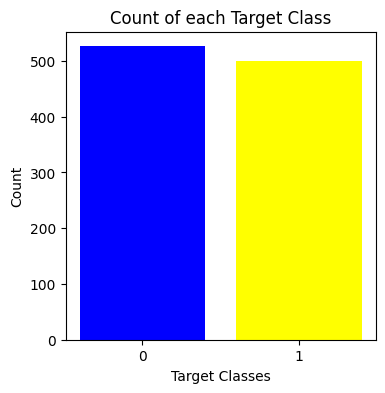

In [ ]:
rcParams['figure.figsize'] = 4,4
plt.bar(heart_data['target'].unique(), heart_data['target'].value_counts(), color = ['blue', 'yellow'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

In [ ]:
target_value = heart_data.target.value_counts()
print("Percentage of patience without heart problems: "+str(round(target_value[0]*100/1025,2)))
print("Percentage of patience with heart problems: "+str(round(target_value[1]*100/1025,2)))

Percentage of patience without heart problems: 48.68
Percentage of patience with heart problems: 51.32


<Axes: >

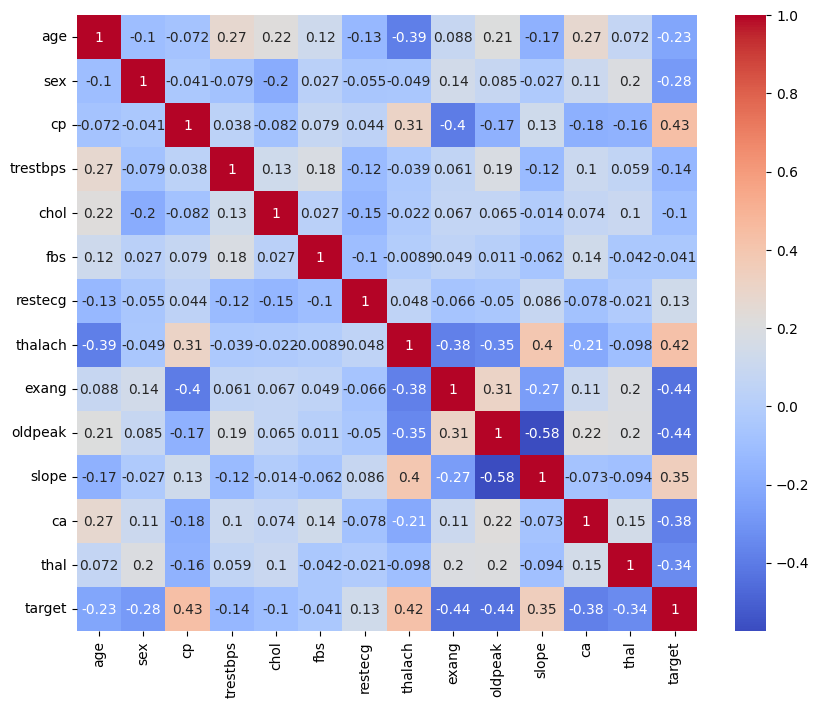

In [ ]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(10, 8))
sns.heatmap(dataset, annot=True, cmap='coolwarm')

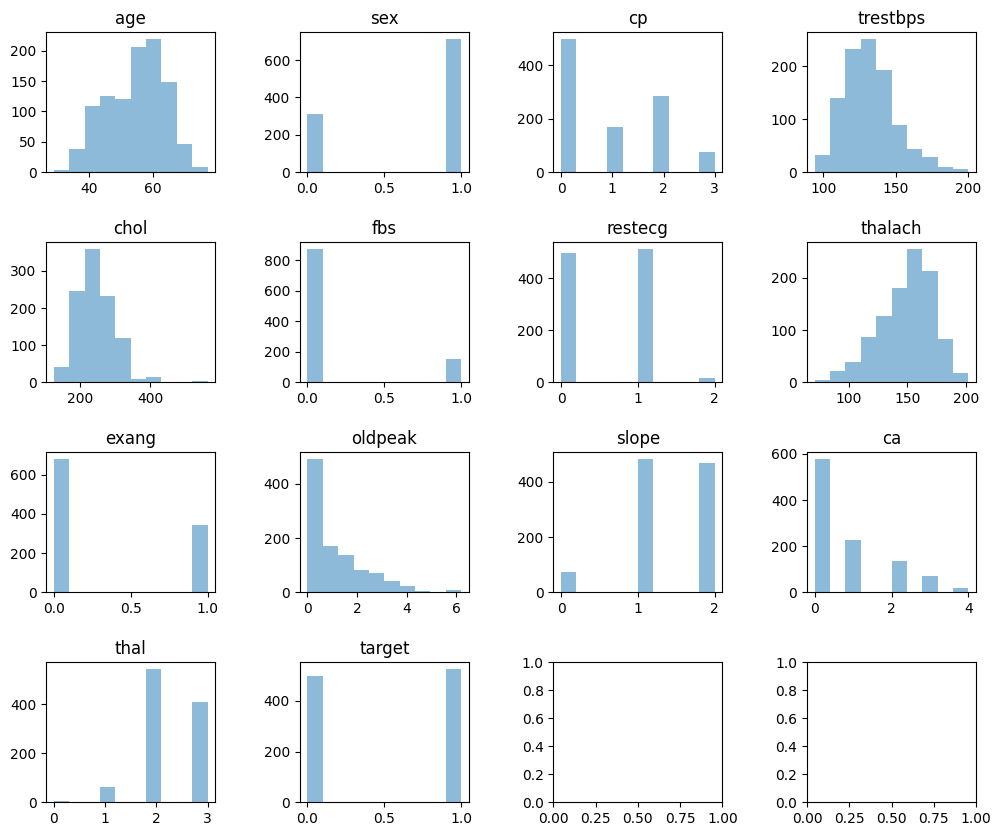

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Plot the histograms for each feature in the heart data
for i, ax in enumerate(axes.flat):
    if i < len(heart_data.columns):
        ax.hist(heart_data.iloc[:, i], bins=10, alpha=0.5)
        ax.set_title(heart_data.columns[i])
        
# Display the histogram plots
plt.show()

**We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features**

**Analysing the 'Sex' feature**

In [ ]:
heart_data["sex"].unique()

array([1, 0])

*sex feature has only two values*

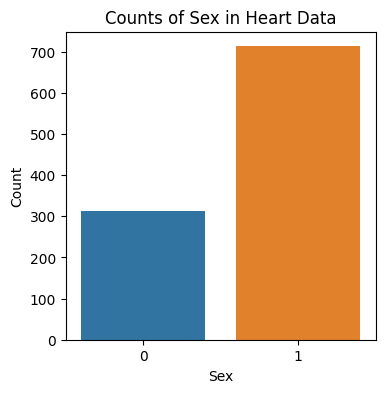

In [ ]:
sns.countplot(x='sex', data=heart_data)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Counts of Sex in Heart Data')
plt.show()

**Analysing the 'Chest Pain Type' feature**

In [ ]:
heart_data["cp"].unique()

array([0, 1, 2, 3])

*As expected, the CP feature has values from 0 to 3*

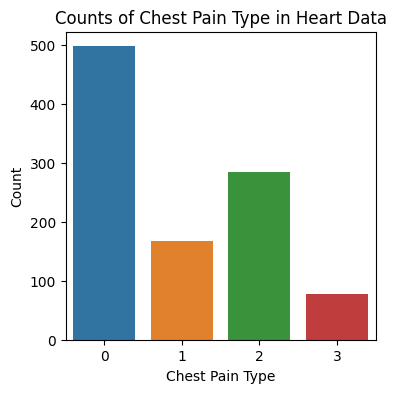

In [ ]:
sns.countplot(x='cp', data=heart_data)
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Counts of Chest Pain Type in Heart Data')
plt.show()

*We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems*

**Analysing the FBS feature**

In [ ]:
heart_data["fbs"].describe()

count    1025.000000
mean        0.149268
std         0.356527
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: fbs, dtype: float64

In [ ]:
heart_data["fbs"].unique()

array([0, 1])

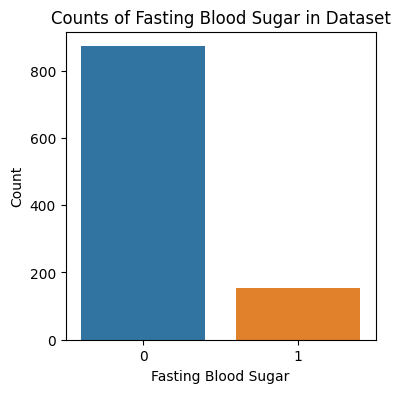

In [ ]:
sns.countplot(x='fbs', data=heart_data)
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Count')
plt.title('Counts of Fasting Blood Sugar in Dataset')
plt.show()

**Analysing the restecg feature**

In [ ]:
heart_data["restecg"].unique()

array([1, 0, 2])

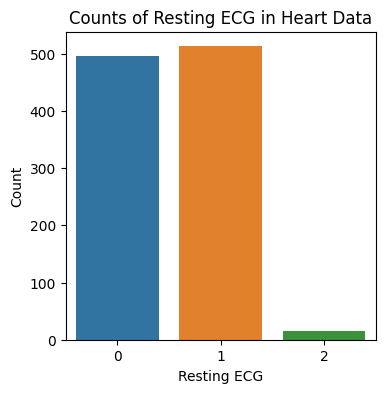

In [ ]:
sns.countplot(x='restecg', data=heart_data)
plt.xlabel('Resting ECG')
plt.ylabel('Count')
plt.title('Counts of Resting ECG in Heart Data')
# Display the plot
plt.show()

**We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'**

**Analysing the 'exang' feature**

In [ ]:
heart_data["exang"].unique()

array([0, 1])

Text(0.5, 1.0, 'Counts of exang in Heart Data')

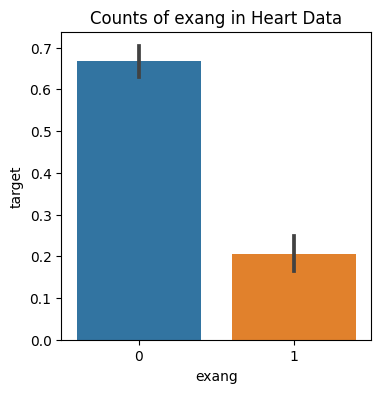

In [ ]:
sns.barplot(x=heart_data["exang"], y=heart_data["target"])
# Add labels and title
plt.xlabel('exang')
plt.ylabel('target')
plt.title('Counts of exang in Heart Data')

**People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems**

**Analysing the Slope feature**

In [ ]:
heart_data["slope"].unique()

array([2, 0, 1])

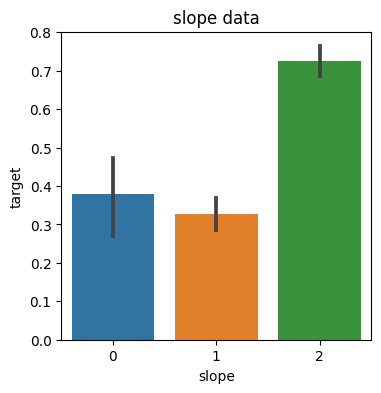

In [ ]:
y = heart_data['target']
sns.barplot(x=heart_data["slope"], y=y)
plt.xlabel('slope')
plt.ylabel('target')
plt.title('slope data')
plt.show()

*We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'*

**Analysing the 'ca' feature**

In [ ]:
heart_data["ca"].unique()

array([2, 0, 1, 3, 4])

<Axes: xlabel='ca', ylabel='target'>

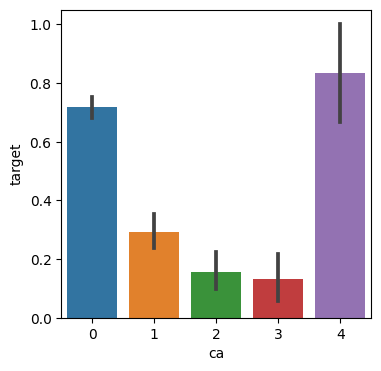

In [ ]:
sns.barplot(x=heart_data["ca"], y=y)

**Analysing the 'thal' feature**

In [ ]:
heart_data["thal"].unique()

array([3, 2, 1, 0])

<Axes: xlabel='thal', ylabel='target'>

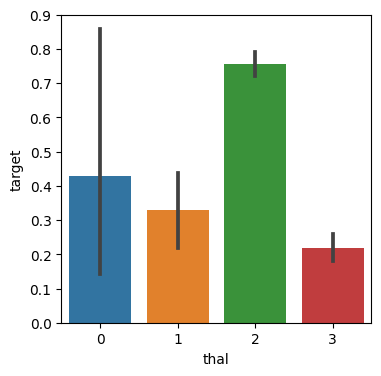

In [ ]:
sns.barplot(x=heart_data["thal"], y=y)

<ipython-input-41-a881bffaf3de>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["thal"])


<Axes: xlabel='thal', ylabel='Density'>

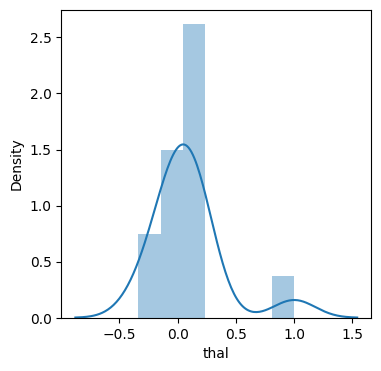

In [ ]:
sns.distplot(dataset["thal"])

**IV. Train Test split**

spilting the data into training data and test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, stratify=Y, random_state=42)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1025, 13) (820, 13) (205, 13)


In [ ]:
#standarizing data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
scaler.inverse_transform(X_train)

array([[62.,  0.,  0., ...,  1.,  3.,  2.],
       [56.,  0.,  0., ...,  0.,  2.,  3.],
       [57.,  1.,  2., ...,  1.,  1.,  3.],
       ...,
       [62.,  0.,  0., ...,  0.,  3.,  3.],
       [53.,  1.,  0., ...,  1.,  2.,  3.],
       [61.,  1.,  2., ...,  1.,  0.,  2.]])

Model training


**LINEAR REGRESSION**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,Y_train)
scores = cross_val_score(regression, X_train, Y_train, scoring='neg_mean_squared_error', cv=5)
np.mean(scores)

-0.1265582732553291

In [ ]:
reg_pred=regression.predict(X_test)
reg_pred

array([-0.05725743,  0.43076375, -0.10745804,  0.64342534,  0.36776542,
        0.01726301,  0.73267437,  0.55733783,  0.96078946,  0.43076375,
        0.71207086,  0.84289912,  0.55733783,  0.18523071,  0.64858103,
        0.02244547,  0.336212  ,  0.07156896,  0.55331884,  0.7826747 ,
       -0.11192582,  0.11180222,  0.51169513,  1.00270581,  0.54105622,
        1.09042054,  0.19182757,  0.18523071,  0.647803  , -0.02900203,
        0.74381311,  0.74582834,  0.81630873,  0.88733699, -0.12680414,
        0.23377178,  0.64434858,  0.33878667,  0.51254431,  0.94102128,
       -0.08545651,  0.95742722,  0.64469703,  0.94102128,  0.66681061,
       -0.12578141,  0.73267437,  1.00270581, -0.10410787,  0.68984796,
        0.42032741,  0.11180222,  0.7826747 ,  0.08658432,  1.12515853,
       -0.05450401,  1.10420124,  1.02386212,  0.95156799,  0.28934999,
        0.5016424 ,  0.98489065,  0.88934694,  0.32480141,  0.59622232,
        0.06408444,  0.57772761,  0.92606806,  0.41307102,  0.61

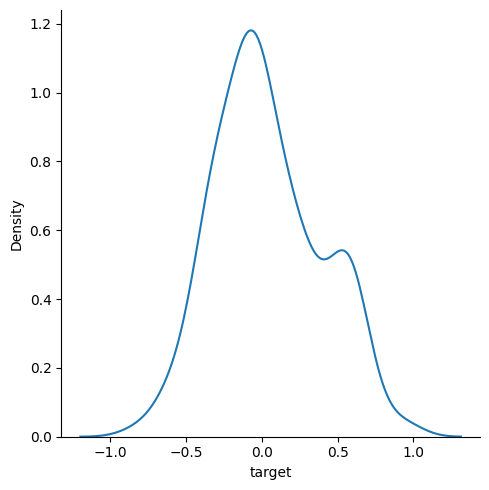

In [ ]:
sns.displot(reg_pred-Y_test,kind='kde')

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score( Y_test,reg_pred)
print('R-squared score:', r2)

R-squared score: 0.505617116352929


In [ ]:
from sklearn.linear_model import LinearRegression
# create a LinearRegression object
regression = LinearRegression()
# fit the model to the training data
regression.fit(X_train, Y_train)
# calculate R-squared score for the training data
train_score = regression.score(X_train, Y_train)
print('Training R-squared score:', train_score)
# calculate R-squared score for the testing data
test_score = regression.score(X_test, Y_test)
print('Testing R-squared score:', test_score)

Training R-squared score: 0.5150182706960567
Testing R-squared score: 0.505617116352929


**Ridge Regression Algorithm**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge_regressor=Ridge()
parameters={'alpha':[1,2,3,5,10,23,30,40,50,60,70,80,90]}
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(X_train,Y_train)
print(ridgecv.best_params_)
print(ridgecv.best_score_)
ridge_pred=ridgecv.predict(X_test)

{'alpha': 70}
-0.12621820736060077


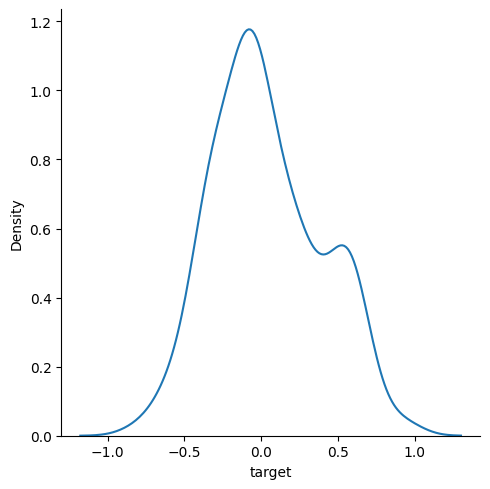

In [ ]:
import seaborn as sns
sns.displot(ridge_pred-Y_test,kind='kde')

In [ ]:
ridge_pred = ridgecv.predict(X_test)
score = r2_score(Y_test, ridge_pred)
print(score)

0.5055784769927568


In [ ]:
from sklearn.metrics import r2_score
ridge_regressor = Ridge(alpha=70)
ridge_regressor.fit(X_train, Y_train)
train_pred = ridge_regressor.predict(X_train)
test_pred = ridge_regressor.predict(X_test)
train_score = r2_score(Y_train, train_pred)
test_score = r2_score(Y_test, test_pred)
print("Train accuracy:", train_score)
print("Test accuracy:", test_score)

Train accuracy: 0.5142176655222288
Test accuracy: 0.5055784769927568


**LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
classifier = LogisticRegression()
parameters = {'penalty': ['l1', 'l2', 'elasticnet'], 'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50], 'max_iter': [100, 200, 300]}
classifier_regressor = GridSearchCV(classifier, param_grid=parameters, scoring='accuracy', cv=5)
classifier_regressor.fit(X_train, Y_train)
print(classifier_regressor.best_params_)
print(classifier_regressor.best_score_)
Y_pred = classifier_regressor.predict(X_test)
score = accuracy_score(Y_pred, Y_test)
print("Test accuracy score:", score)
print(classification_report(Y_pred, Y_test))

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}
0.8439024390243903
Test accuracy score: 0.8097560975609757
              precision    recall  f1-score   support

           0       0.70      0.89      0.78        79
           1       0.91      0.76      0.83       126

    accuracy                           0.81       205
   macro avg       0.81      0.82      0.81       205
weighted avg       0.83      0.81      0.81       205



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
330 fits failed out of a total of 495.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
165 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: So

In [ ]:
model = LogisticRegression()
model.fit(X_train, Y_train)
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print(training_data_accuracy)
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print(test_data_accuracy)

0.8463414634146341
0.8097560975609757


In [ ]:
conf_matrix = confusion_matrix(Y_test, X_test_prediction)
print("Confusion matrix:")
print(conf_matrix)

Confusion matrix:
[[70 30]
 [ 9 96]]


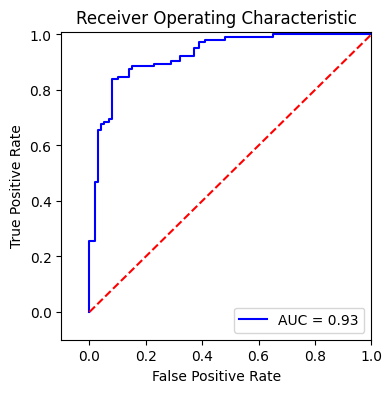

ROC AUC: 0.9266666666666667


In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_test, reg_pred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.1, 1.0])
plt.ylim([-0.1, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("ROC AUC:", roc_auc)


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)
X_train_prediction = knn.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
X_test_prediction = knn.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print((training_data_accuracy)*100,2)
print((test_data_accuracy)*100,2)

100.0 2
100.0 2


In [ ]:
# Print confusion matrix
conf_matrix = confusion_matrix(Y_test, X_test_prediction)
print("Confusion matrix:")
print(conf_matrix)

Confusion matrix:
[[100   0]
 [  0 105]]


In [ ]:
# Print classification report
class_report = classification_report(Y_test, X_test_prediction)
print("Classification report:")
print(class_report)

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



**Choosing a K Value**

In [ ]:
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Error Rate')

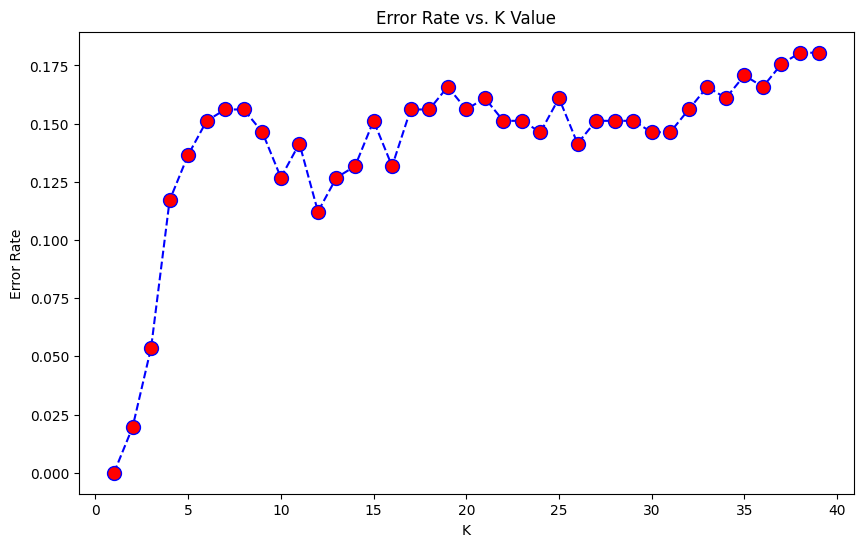

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=23)
KNN.fit(X_train, Y_train)
X_train_prediction = KNN.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
X_test_prediction = KNN.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print((training_data_accuracy)*100,2)
print((test_data_accuracy)*100,2)

86.09756097560975 2
84.8780487804878 2


In [ ]:
conf_matrix = confusion_matrix(Y_test, X_test_prediction)
print("Confusion matrix:")
print(conf_matrix)
class_report = classification_report(Y_test, X_test_prediction)
print("Classification report:")
print(class_report)

Confusion matrix:
[[79 21]
 [10 95]]
Classification report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       100
           1       0.82      0.90      0.86       105

    accuracy                           0.85       205
   macro avg       0.85      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205



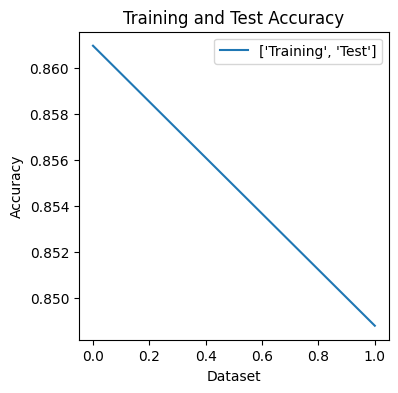

In [ ]:
train_preds = KNN.predict(X_train)
test_preds = KNN.predict(X_test)
train_accuracy = accuracy_score(Y_train, train_preds)
test_accuracy = accuracy_score(Y_test, test_preds)
# Plot the training and test accuracy over time (i.e., epochs)
plt.plot([0, 1], [train_accuracy, test_accuracy], label=['Training', 'Test'])
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.show()

decison

In [ ]:
from sklearn.tree import DecisionTreeClassifier
max_accuracy = 0
for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train, Y_train)
    Y_pred_dt_train = dt.predict(X_train)
    Y_pred_dt_test = dt.predict(X_test)
    train_accuracy = round(accuracy_score(Y_pred_dt_train, Y_train) * 100, 2)
    test_accuracy = round(accuracy_score(Y_pred_dt_test, Y_test) * 100, 2)
    if test_accuracy > max_accuracy:
        max_accuracy = test_accuracy
        best_x = x


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train, Y_train)
Y_pred_dt_train = dt.predict(X_train)
Y_pred_dt_test = dt.predict(X_test)
train_accuracy = round(accuracy_score(Y_pred_dt_train, Y_train) * 100, 2)
test_accuracy = round(accuracy_score(Y_pred_dt_test, Y_test) * 100, 2)
print('Training accuracy:', train_accuracy)
print('Test accuracy:', test_accuracy)

Training accuracy: 100.0
Test accuracy: 98.54


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
train_accuracy = accuracy_score(Y_train, dtc.predict(X_train))
test_accuracy = accuracy_score(Y_test, dtc.predict(X_test))
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 1.0
Test Accuracy: 0.9853658536585366


XGB

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)
Y_pred_xgb_train = xgb_model.predict(X_train)
Y_pred_xgb_test = xgb_model.predict(X_test)
train_accuracy = round(accuracy_score(Y_pred_xgb_train, Y_train) * 100, 2)
test_accuracy = round(accuracy_score(Y_pred_xgb_test, Y_test) * 100, 2)
print('Training accuracy:', train_accuracy)
print('Test accuracy:', test_accuracy)

Training accuracy: 100.0
Test accuracy: 100.0


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)
Y_pred_nb_train = nb.predict(X_train)
Y_pred_nb_test = nb.predict(X_test)
train_accuracy = round(accuracy_score(Y_pred_nb_train, Y_train) * 100, 2)
test_accuracy = round(accuracy_score(Y_pred_nb_test, Y_test) * 100, 2)
print('Training accuracy:', train_accuracy)
print('Test accuracy:', test_accuracy)

Training accuracy: 83.05
Test accuracy: 82.93


SVM

In [ ]:
from sklearn import svm
sv = svm.SVC(kernel='linear')
sv.fit(X_train, Y_train)
Y_pred_svm_train = sv.predict(X_train)
Y_pred_svm_test = sv.predict(X_test)
train_accuracy = round(accuracy_score(Y_pred_svm_train, Y_train) * 100, 2)
test_accuracy = round(accuracy_score(Y_pred_svm_test, Y_test) * 100, 2)
print('Training accuracy:', train_accuracy)
print('Test accuracy:', test_accuracy)

Training accuracy: 86.1
Test accuracy: 81.46


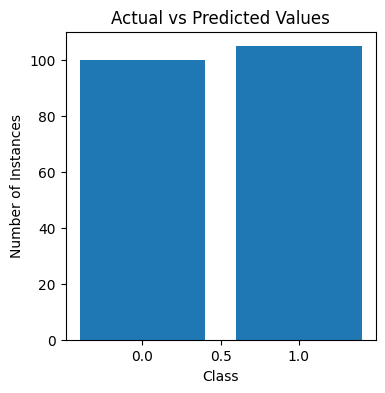

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred_svm_test})
counts = df.groupby('Actual').count()['Predicted']
plt.bar(counts.index, counts.values)
plt.title('Actual vs Predicted Values')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.show()

RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Define the range of values for n_estimators
n_estimators_range = range(1, 41)

# Initialize an empty list to store the cross-validation scores
cv_scores = []

# Perform cross-validation for each value of n_estimators
for n_estimators in n_estimators_range:
    # Create a Random Forest classifier with the current value of n_estimators
    rfc = RandomForestClassifier(n_estimators=n_estimators, random_state=12345)
    
    # Perform cross-validation with 5 folds
    scores = cross_val_score(rfc, X, Y, cv=5)
    
    # Calculate the average score across all folds
    mean_score = np.mean(scores)
    
    # Append the mean score to the list of cv_scores
    cv_scores.append(mean_score)

# Find the index of the best score
best_index = np.argmax(cv_scores)

# Get the best value of n_estimators
best_n_estimators = n_estimators_range[best_index]

print("Best value for n_estimators:", best_n_estimators)


Best value for n_estimators: 31


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=31,random_state=42)
rf.fit(X_train, Y_train)
# Make predictions on the training and test sets
Y_pred_rf_train = rf.predict(X_train)
Y_pred_rf_test = rf.predict(X_test)
# Calculate the accuracy scores
train_accuracy = round(accuracy_score(Y_pred_rf_train, Y_train) * 100, 2)
test_accuracy = round(accuracy_score(Y_pred_rf_test, Y_test) * 100, 2)
# Print the accuracy scores
print('Training accuracy:', train_accuracy)
print('Test accuracy:', test_accuracy)

Training accuracy: 100.0
Test accuracy: 100.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=31, random_state=42)
rf.fit(X_train, Y_train)

y_pred_rf_train = rf.predict(X_train)
y_pred_rf_test = rf.predict(X_test)

train_accuracy = round(accuracy_score(Y_train, y_pred_rf_train) * 100, 2)
test_accuracy = round(accuracy_score(Y_test, y_pred_rf_test) * 100, 2)

train_error = 100 - train_accuracy
test_error = 100 - test_accuracy

print('Training error:', train_error)
print('Test error:', test_error)


Training error: 0.0
Test error: 0.0


In [ ]:
from sklearn.metrics import confusion_matrix
rf.fit(X_train, Y_train)
Y_pred_rf_test = rf.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred_rf_test)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[100   0]
 [  0 105]]


FINAL

In [ ]:
models = [LogisticRegression(), GaussianNB(), svm.SVC(kernel='linear'), KNeighborsClassifier(n_neighbors=7), DecisionTreeClassifier(), RandomForestClassifier(), xgb.XGBClassifier(objective="binary:logistic", random_state=42)]
model_names = ["Logistic Regression", "Naive Bayes", "Support Vector Machine", "K-Nearest Neighbors", "Decision Tree", "Random Forest", "XGBoost"]
for i, model in enumerate(models):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy = round(accuracy_score(Y_pred, Y_test)*100, 2)
    print("Accuracy of", model_names[i], ":", accuracy, "%")


Accuracy of Logistic Regression : 80.98 %
Accuracy of Naive Bayes : 82.93 %
Accuracy of Support Vector Machine : 81.46 %
Accuracy of K-Nearest Neighbors : 84.39 %
Accuracy of Decision Tree : 98.54 %
Accuracy of Random Forest : 100.0 %
Accuracy of XGBoost : 100.0 %


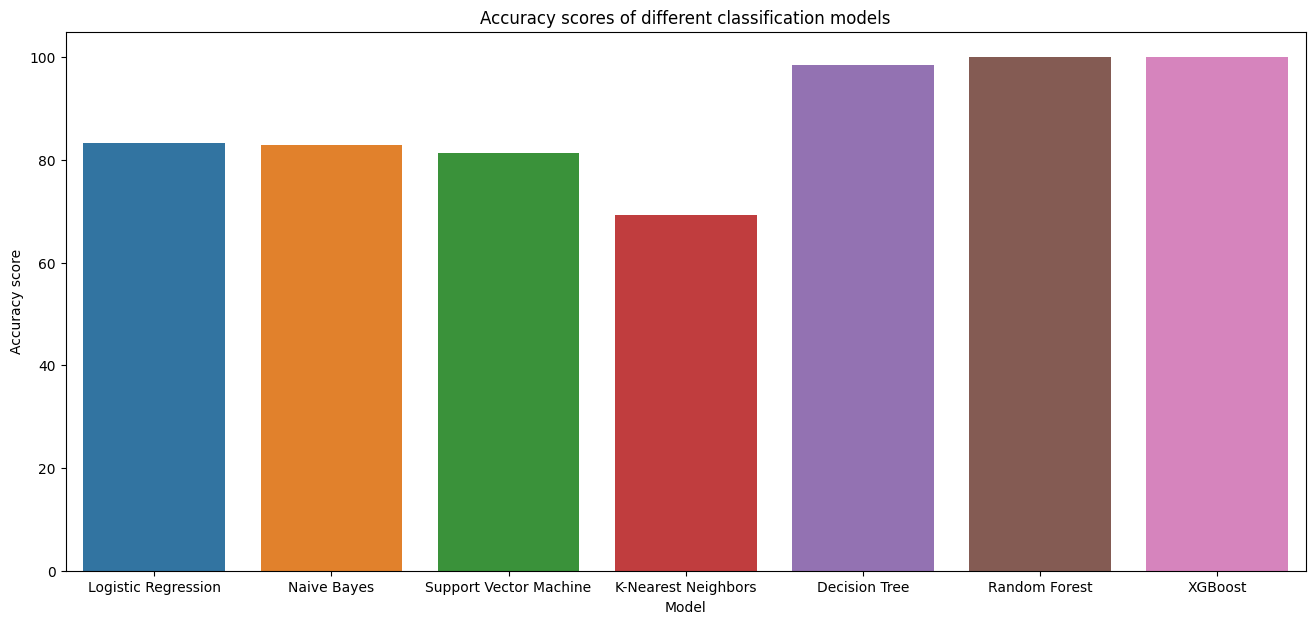

In [ ]:
import seaborn as sns
accuracy_scores=[83.41,82.93,81.46,69.27,98.54,100.0,100.0]
plt.figure(figsize=(16, 7))
sns.barplot(x=model_names, y=accuracy_scores)
plt.title("Accuracy scores of different classification models")
plt.xlabel("Model")
plt.ylabel("Accuracy score")
plt.show()

**IMPORTING PICKLE FILE**

In [ ]:
import pickle

In [ ]:
pickle.dump(rf,open('/content/heart_model_saved','wb'))


In [ ]:
model_loaded=pickle.load(open('/content/heart_model_saved','rb'))